In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # Convert DataFrame to numpy array if input is DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # 1. Data Preprocessing
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # 2. Compute the Covariance Matrix
        covariance_matrix = np.cov(X.T)
        
        # 3. Compute the Eigenvectors and Eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        # 4. Select Principal Components
        idx = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, idx[:self.n_components]]
        
    def transform(self, X):
        # Convert DataFrame to numpy array if input is DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.values
        
        # Project data onto the new feature space
        X = X - self.mean
        transformed_data = np.dot(X, self.components)
        
        # If the input was a DataFrame, return a DataFrame
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])], index=X.index)
        else:
            return pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])


In [10]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [12]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
# Compute the correlation matrix
correlation_matrix = df.corr()

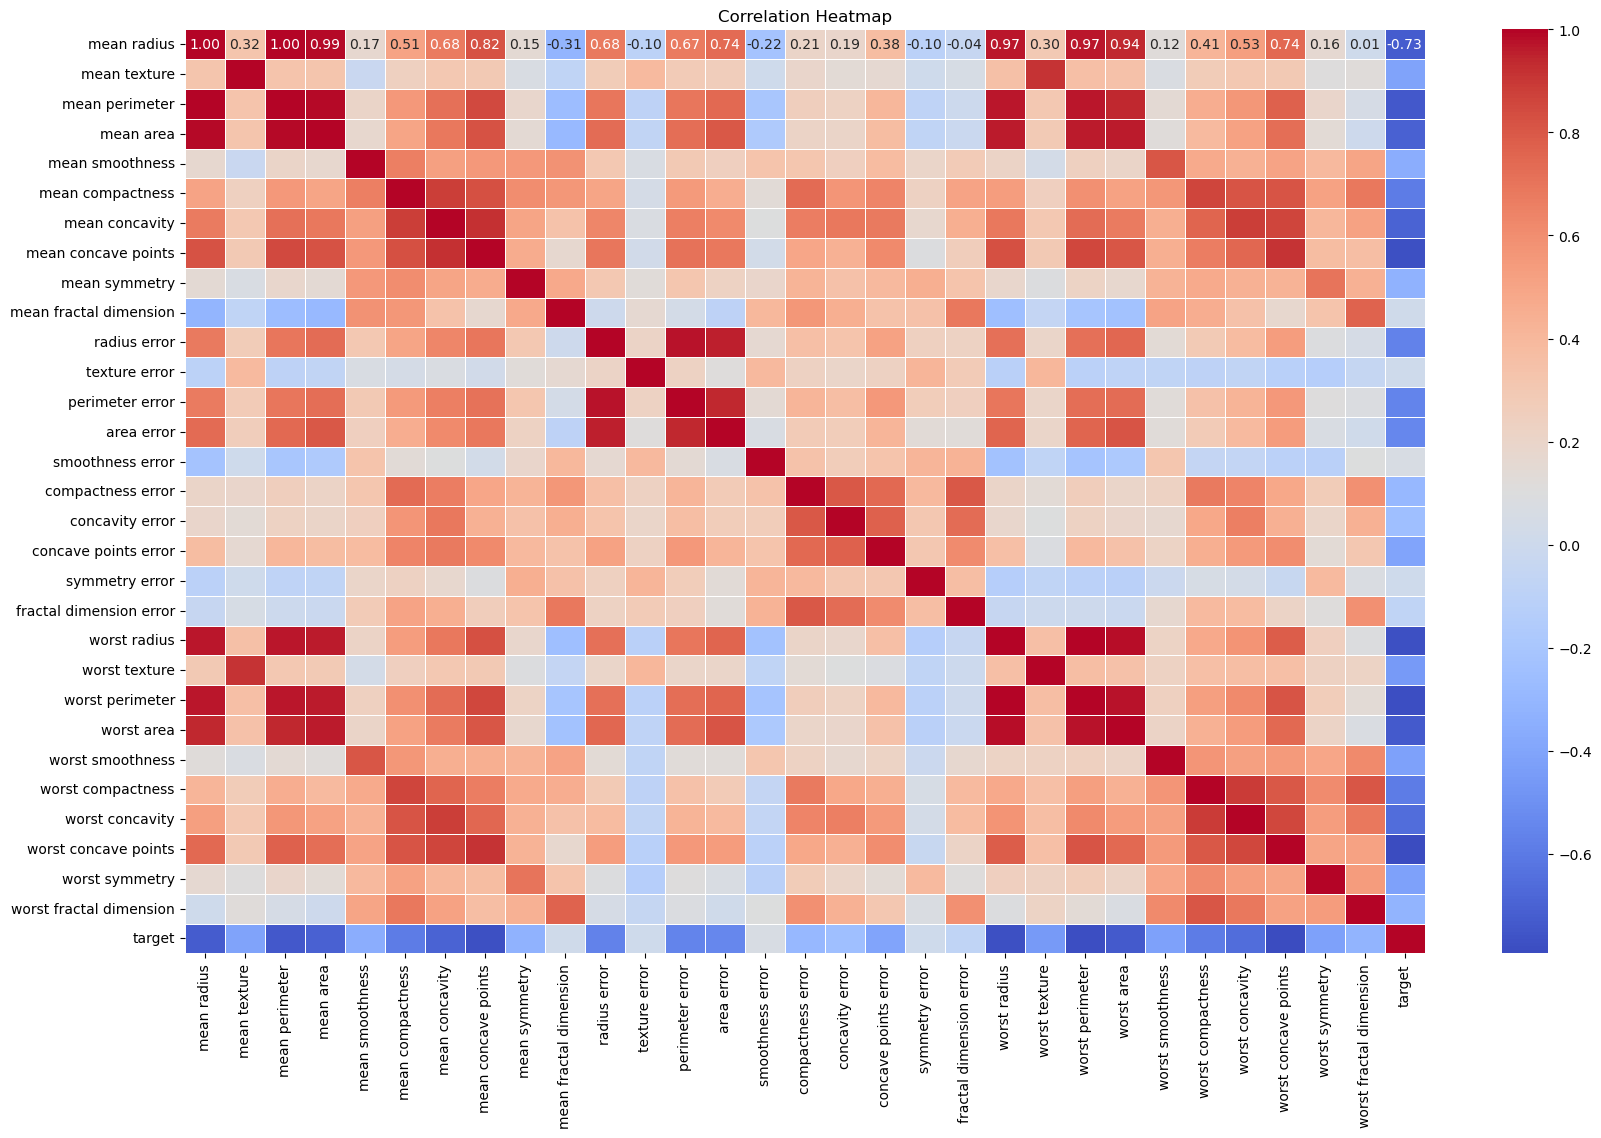

In [18]:
# Create a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
X=df.drop(['target'],axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
pca=PCA(n_components=3)
pca.fit(X)

In [28]:
new_df=pca.transform(X)
new_df['target']=df['target']
new_df.head()

,PC1,PC2,PC3,target
0,1160.142574,-293.917544,48.578398,0
1,1269.122443,15.630182,-35.394534,0
2,995.793889,39.156743,-1.709753,0
3,-407.180803,-67.380320,8.672848,0
4,930.341180,189.340742,1.374801,0


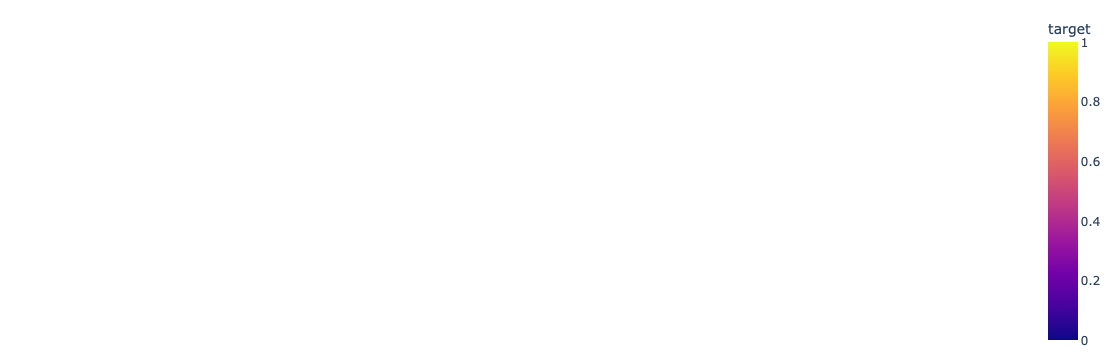

In [37]:
import plotly.express as px

fig = px.scatter_3d(new_df, x='PC1', y='PC2', z='PC3', color='target')
# Update marker size
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
                    xaxis_title='PC1',
                    yaxis_title='PC2',
                    zaxis_title='PC3'),
                  width=900,
                  margin=dict(r=20, b=10, l=10, t=10))
fig.show()


In [25]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
pca1=PCA(n_components=3)
pca1.fit(X_scaled)

In [32]:
new_df1=pca1.transform(X)
new_df1['target']=df['target']
new_df1.head()

,PC1,PC2,PC3,target
0,793.364674,-772.386400,28.693570,0
1,831.376304,-819.573038,21.695304,0
2,751.111800,-737.924156,26.218798,0
3,271.973741,-262.394926,4.912013,0
4,741.248858,-730.596479,30.886047,0


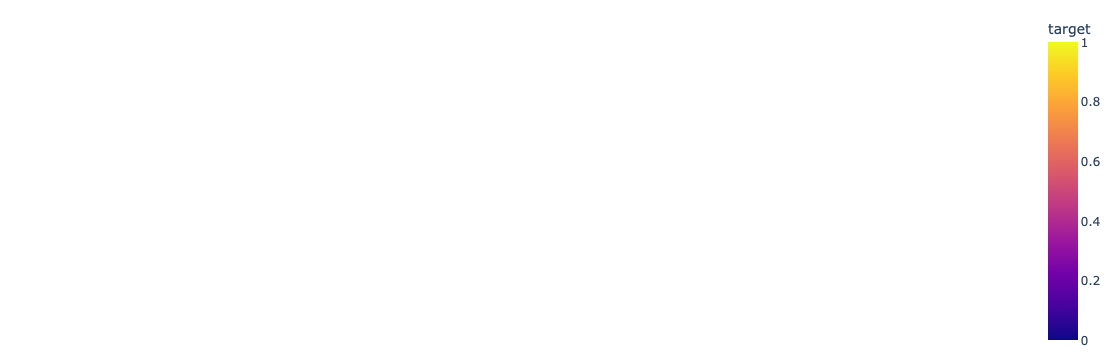

In [36]:
import plotly.express as px

fig = px.scatter_3d(new_df1, x='PC1', y='PC2', z='PC3', color='target')
# Update marker size
fig.update_traces(marker=dict(size=2))
fig.update_layout(scene=dict(
                    xaxis_title='PC1',
                    yaxis_title='PC2',
                    zaxis_title='PC3'),
                  width=900,
                  margin=dict(r=20, b=10, l=10, t=10))
fig.show()
